In [74]:
try:
    import citipy
except:
    import pip
    pip.main(['install','citipy'])
    import citipy

In [75]:
# Import the dependencies

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

In [76]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform( low = -90.000, high = 90.000, size = 1500)

lngs = np.random.uniform( low = -180.000, high = 180.000, size = 1500)

lat_lngs = zip(lats, lngs)

lat_lngs

# zip() will pack each pair having the same index in their respective array into a tuple
# A zip can be unzipped once

In [77]:
# Add the latitudes and longitudes to a list

coordinates = list(lat_lngs) 

# this will unzip into a list

In [78]:
# use the print() to display the latitude and longitude combinations.

#for coordinate in coordinates:
    #print(coordinate[0], coordinate[1])

In [79]:
from citipy import citipy

In [80]:
# Create a list to hold the cities

cities = []

# Use for loop to identify nearest city for each lat and longatude combo

for coordinate in coordinates:
    
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    # If the city is unique, then we add it to cities list.
    
    if city not in cities:
        
        cities.append(city)
        
# Print the city count to confirm total (1500) 

len(cities)

628

In [81]:
# Import the time library and the datetime module from the datetime library

import time

from datetime import datetime

# import requests module

import requests

#import API key

from config import weather_api_key

In [82]:
# Starting URL for Weather Map API Call

url = 'http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=' + weather_api_key


In [101]:
# Create an empty list to hold the weather data

city_data = []

# Print the beginning of the logging

print("Beginning Data Retrieval        ")
print('--------------------------------')


# Create counters.

record_count = 1

set_count = 1

# Loop through all the cities in our list



#loop through all the cities in our list

for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    
    if (i % 50 == 0 and i >= 50):
        
        set_count += 1
        
        record_count = 1
        
        time.sleep(60)
        
        
        
    # Create endpoint URL with each city.
    
    city_url = url + "&q=" + city.replace(" ","+")
    
    
    
    # Log the url, record, and set numbers and the city.
    
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    
    # Add 1 to the record count.
    
    record_count += 1
    
# Run an API request for each of the cities.
    
    try:
        
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        
        # Convert the date to ISO standard
        
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('$Y-$m-%d %H:%M:%S')
        
        # Append the city info into city_data list.
        
        city_data.append({'City': city.title(),
                        'Lat': city_lat,
                        'Lng': city_lng,
                        'Max Temp': city_max_temp,
                        'Humidity': city_humidity,
                        'Cloudiness': city_clouds,
                        'Wind Speed': city_wind,
                        'Country': city_clouds,
                        'Date': city_date})
# If an error is experienced, skip the city.
    except:
        
        print('City not found. Skipping...')
        
        pass

# Indicate that Data loading is complete

print('----------------------------------')
print('Date Retrival Complete            ')
print('----------------------------------')

Beginning Data Retrieval        
--------------------------------
Processing Record 1 of Set 1 | lorengau
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | qaanaaq
Processing Record 6 of Set 1 | shatrovo
Processing Record 7 of Set 1 | chokurdakh
Processing Record 8 of Set 1 | maumere
Processing Record 9 of Set 1 | sitka
Processing Record 10 of Set 1 | sfantu gheorghe
Processing Record 11 of Set 1 | kavieng
Processing Record 12 of Set 1 | torbay
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 15 of Set 1 | kaitangata
Processing Record 16 of Set 1 | norman wells
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | belaya gora
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | nanchong
Processing Record 21 of Set 1 | mys shmidta
City not found. Skipping...
Processing 

Processing Record 32 of Set 4 | mocuba
Processing Record 33 of Set 4 | dingle
Processing Record 34 of Set 4 | malwan
City not found. Skipping...
Processing Record 35 of Set 4 | el fuerte
Processing Record 36 of Set 4 | thompson
Processing Record 37 of Set 4 | olafsvik
Processing Record 38 of Set 4 | puerto ayora
Processing Record 39 of Set 4 | zabol
Processing Record 40 of Set 4 | pisco
Processing Record 41 of Set 4 | merrill
Processing Record 42 of Set 4 | monte alegre
Processing Record 43 of Set 4 | baruun-urt
Processing Record 44 of Set 4 | henties bay
Processing Record 45 of Set 4 | eskasem
City not found. Skipping...
Processing Record 46 of Set 4 | klaksvik
Processing Record 47 of Set 4 | tadine
Processing Record 48 of Set 4 | longyearbyen
Processing Record 49 of Set 4 | tinogboc
Processing Record 50 of Set 4 | antalaha
Processing Record 1 of Set 5 | rorvik
Processing Record 2 of Set 5 | hami
Processing Record 3 of Set 5 | makakilo city
Processing Record 4 of Set 5 | samarai
Proce

Processing Record 21 of Set 8 | zhangjiakou
Processing Record 22 of Set 8 | bereda
Processing Record 23 of Set 8 | ituni
City not found. Skipping...
Processing Record 24 of Set 8 | touros
Processing Record 25 of Set 8 | meulaboh
Processing Record 26 of Set 8 | japura
Processing Record 27 of Set 8 | barra do corda
Processing Record 28 of Set 8 | alice springs
Processing Record 29 of Set 8 | beyneu
Processing Record 30 of Set 8 | kosovska mitrovica
Processing Record 31 of Set 8 | noyabrsk
Processing Record 32 of Set 8 | awbari
Processing Record 33 of Set 8 | carutapera
Processing Record 34 of Set 8 | nabire
Processing Record 35 of Set 8 | boatlaname
City not found. Skipping...
Processing Record 36 of Set 8 | gat
Processing Record 37 of Set 8 | lompoc
Processing Record 38 of Set 8 | fairbanks
Processing Record 39 of Set 8 | manakara
Processing Record 40 of Set 8 | woodward
Processing Record 41 of Set 8 | comodoro rivadavia
Processing Record 42 of Set 8 | mahajanga
Processing Record 43 of 

Processing Record 8 of Set 12 | yar-sale
Processing Record 9 of Set 12 | gornopravdinsk
Processing Record 10 of Set 12 | ulladulla
Processing Record 11 of Set 12 | barra patuca
Processing Record 12 of Set 12 | suleja
Processing Record 13 of Set 12 | auray
Processing Record 14 of Set 12 | aljezur
Processing Record 15 of Set 12 | la macarena
Processing Record 16 of Set 12 | obala
Processing Record 17 of Set 12 | adrar
Processing Record 18 of Set 12 | auki
Processing Record 19 of Set 12 | aviles
Processing Record 20 of Set 12 | nemuro
Processing Record 21 of Set 12 | maceio
Processing Record 22 of Set 12 | nioki
Processing Record 23 of Set 12 | chuy
Processing Record 24 of Set 12 | lere
Processing Record 25 of Set 12 | tautira
Processing Record 26 of Set 12 | lima
Processing Record 27 of Set 12 | petrov val
Processing Record 28 of Set 12 | zhaotong
Processing Record 29 of Set 12 | bandarbeyla
Processing Record 30 of Set 12 | katunino
Processing Record 31 of Set 12 | parvatipuram
Processin

In [102]:
len(city_data)

577

In [103]:
# Convert the array of dictionaries to a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lorengau,-2.0226,147.2712,27.83,73,35,3.38,35,$Y-$m-16 10:23:22
1,Ushuaia,-54.8000,-68.3000,3.81,87,75,6.69,75,$Y-$m-16 10:23:23
2,Yellowknife,62.4560,-114.3525,11.29,76,100,3.09,100,$Y-$m-16 10:20:36
3,Punta Arenas,-53.1500,-70.9167,6.06,81,100,6.69,100,$Y-$m-16 10:23:24
4,Qaanaaq,77.4840,-69.3632,-2.53,70,56,2.09,56,$Y-$m-16 10:23:24
5,Shatrovo,56.5167,64.6333,24.42,40,9,1.00,9,$Y-$m-16 10:21:11
6,Chokurdakh,70.6333,147.9167,17.95,38,67,5.43,67,$Y-$m-16 10:23:25
7,Maumere,-8.6199,122.2111,26.59,75,43,2.47,43,$Y-$m-16 10:23:26
8,Sitka,57.0531,-135.3300,10.94,76,0,0.00,0,$Y-$m-16 10:23:26
9,Sfantu Gheorghe,45.8667,25.7833,25.52,49,13,1.14,13,$Y-$m-16 10:23:27


In [104]:
new_coulumn_order = ['City','Country','Date','Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness','Wind Speed']

city_data_df = city_data_df[new_coulumn_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lorengau,35,$Y-$m-16 10:23:22,-2.0226,147.2712,27.83,73,35,3.38
1,Ushuaia,75,$Y-$m-16 10:23:23,-54.8000,-68.3000,3.81,87,75,6.69
2,Yellowknife,100,$Y-$m-16 10:20:36,62.4560,-114.3525,11.29,76,100,3.09
3,Punta Arenas,100,$Y-$m-16 10:23:24,-53.1500,-70.9167,6.06,81,100,6.69
4,Qaanaaq,56,$Y-$m-16 10:23:24,77.4840,-69.3632,-2.53,70,56,2.09
5,Shatrovo,9,$Y-$m-16 10:21:11,56.5167,64.6333,24.42,40,9,1.00
6,Chokurdakh,67,$Y-$m-16 10:23:25,70.6333,147.9167,17.95,38,67,5.43
7,Maumere,43,$Y-$m-16 10:23:26,-8.6199,122.2111,26.59,75,43,2.47
8,Sitka,0,$Y-$m-16 10:23:26,57.0531,-135.3300,10.94,76,0,0.00
9,Sfantu Gheorghe,13,$Y-$m-16 10:23:27,45.8667,25.7833,25.52,49,13,1.14


In [105]:
# Create the output file (CSV)

output_data_file = 'weather_data/cities.csv'

# Export the City_Data into a CSV.

city_data_df.to_csv(output_data_file, index_label='City_ID')

In [107]:
# Create variable for relevant fields to be used in plots

lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df["Cloudiness"]
wind_speed =city_data_df['Wind Speed']


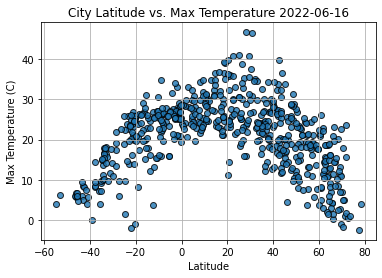

In [108]:
# Import time module

import time

# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,
           max_temps,
           edgecolor='black', 
           linewidths=1,
           marker='o',
           alpha=0.8,
           label="Cities")

# Incorporate the other graph properties.

plt.title(f'City Latitude vs. Max Temperature ' + time.strftime("%x"))
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure

plt.savefig('weather_data/Fig1.png')

# Show plot.

plt.show()

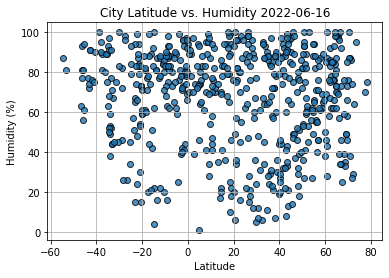

In [109]:
# Build the scatter plot for latitude vs. humidity.

plt.scatter(lats,
           humidity,
           edgecolor='black', 
           linewidths=1,
           marker='o',
           alpha=0.8,
           label="Cities")

# Incorporate the other graph properties.

plt.title(f'City Latitude vs. Humidity ' + time.strftime("%x"))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure

plt.savefig('weather_data/Fig2.png')

# Show plot.

plt.show()

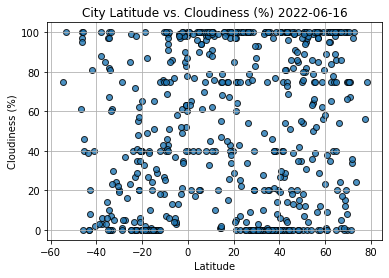

In [110]:
# Build the scatter plot for latitude vs. Cloudiness.

plt.scatter(lats,
           cloudiness,
           edgecolor='black', 
           linewidths=1,
           marker='o',
           alpha=0.8,
           label="Cities")

# Incorporate the other graph properties.

plt.title(f'City Latitude vs. Cloudiness (%) ' + time.strftime("%x"))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure

plt.savefig('weather_data/Fig3.png')

# Show plot.

plt.show()

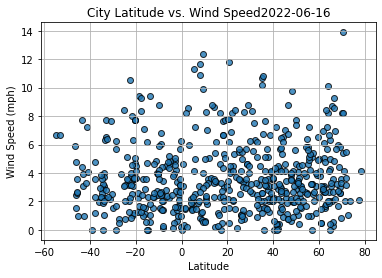

In [111]:
# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,
           wind_speed,
           edgecolor='black', 
           linewidths=1,
           marker='o',
           alpha=0.8,
           label="Cities")

# Incorporate the other graph properties.

plt.title(f'City Latitude vs. Wind Speed' + time.strftime("%x"))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure

plt.savefig('weather_data/Fig4.png')

# Show plot.

plt.show()

In [123]:
# Import linregress

from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data

# and plot a regression line and the equation with the data

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line 'y values' from the slope and intercept
    
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
    
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2)) + '    r-value = ' + str(round(r_value,2))
    
    # Create a scatter plot and plot the regression line
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, 'r')
    
    # Annotate the text for the line equation
    
    plt.annotate(line_eq, text_coordinates, fontsize=10, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [127]:
# Create Northern and Southern Hemisphere df

northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

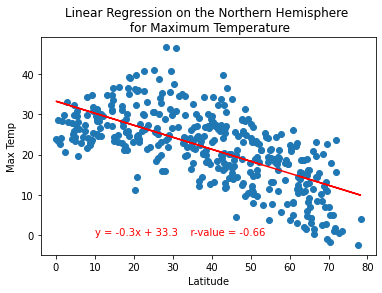

In [150]:
# Linear regressions on the northern hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Call the function

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
                      'Max Temp', (10,0))

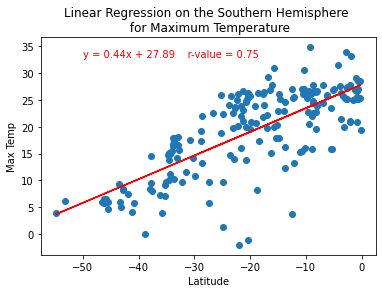

In [152]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(-50,33))

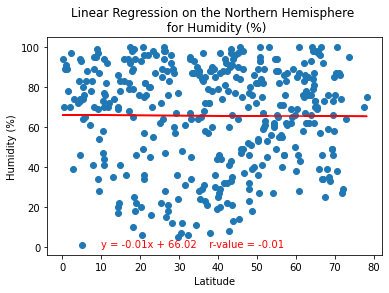

In [153]:
# Linear regressions on the northern hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Call the function

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n for Humidity (%)', 
                      'Humidity (%)', (10,0))

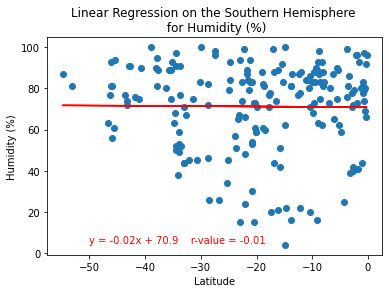

In [154]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Humidity (%)', 
                       'Humidity (%)',(-50,5))

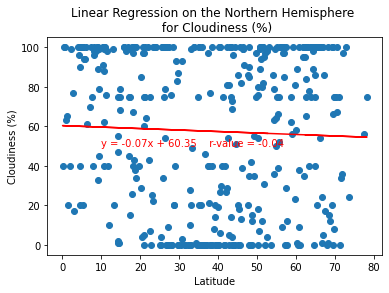

In [156]:
# Linear regressions on the northern hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Call the function

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n for Cloudiness (%)', 
                      'Cloudiness (%)', (10,50))

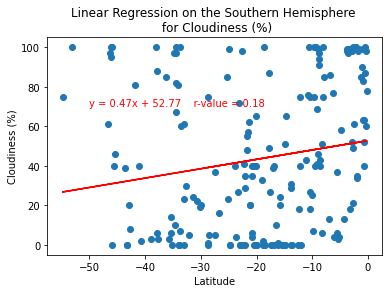

In [158]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Cloudiness (%)', 
                       'Cloudiness (%)',(-50,70))

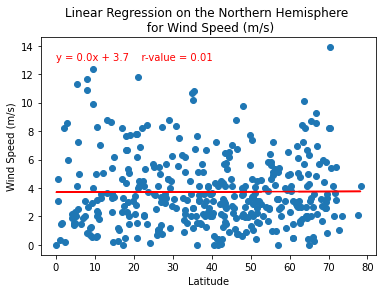

In [166]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed (m/s)', 
                       'Wind Speed (m/s)',(0,13))

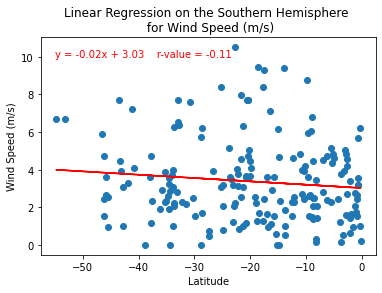

In [163]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed (m/s)', 
                       'Wind Speed (m/s)',(-55,10))